# **ANN Assignment 2 by ANKIT SHARMA (24/AFI/05)**

# **CNN Architecture**

In [ ]:
import torch
import torch.nn as nn

class CNN_1Block(nn.Module):
    def __init__(self, input_channels, num_classes, activation='relu', dropout_conv=False, dropout_fc=False):
        super(CNN_1Block, self).__init__()
        self.activation = nn.ReLU() if activation == 'relu' else nn.Tanh()

        # Block 1: [3*3*16]*2
        self.block1 = nn.Sequential(
            nn.Conv2d(input_channels, 16, kernel_size=3, padding=1),
            self.activation,
            nn.Conv2d(16, 16, kernel_size=3, padding=1),
            self.activation,
            nn.MaxPool2d(2, 2)
        )

        if dropout_conv:
            self.block1.add_module('dropout_conv', nn.Dropout(0.25))

        # Assuming input size is 32x32, after block1 and pooling: 16x16x16
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(16 * 16 * 16, 512),
            self.activation,
        )

        if dropout_fc:
            self.classifier.add_module('dropout_fc1', nn.Dropout(0.5))

        self.classifier.add_module('fc2', nn.Linear(512, num_classes))
        self.classifier.add_module('softmax', nn.Softmax(dim=1))


    def forward(self, x):
          x = self.block1(x)
          x = self.classifier(x)
          return x

class CNN_2Blocks(nn.Module):
    def __init__(self, input_channels, num_classes, activation='relu', dropout_conv=False, dropout_fc=False):
        super(CNN_2Blocks, self).__init__()
        self.activation = nn.ReLU() if activation == 'relu' else nn.Tanh()

        # Block 1: [3*3*16]*2
        self.block1 = nn.Sequential(
            nn.Conv2d(input_channels, 16, kernel_size=3, padding=1),
            self.activation,
            nn.Conv2d(16, 16, kernel_size=3, padding=1),
            self.activation,
            nn.MaxPool2d(2, 2)
        )

        # Block 2: [3*3*32]*2
        self.block2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            self.activation,
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            self.activation,
            nn.MaxPool2d(2, 2)
        )

        if dropout_conv:
            self.block1.add_module('dropout_conv1', nn.Dropout(0.25))
            self.block2.add_module('dropout_conv2', nn.Dropout(0.25))

        # Assuming input size is 32x32, after block2 and pooling: 8x8x32
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 8 * 8, 512),
            self.activation,
        )

        if dropout_fc:
            self.classifier.add_module('dropout_fc1', nn.Dropout(0.5))

        self.classifier.add_module('fc2', nn.Linear(512, num_classes))
        self.classifier.add_module('softmax', nn.Softmax(dim=1))


    def forward(self, x):
          x = self.block1(x)
          x = self.block2(x)
          x = self.classifier(x)
          return x

class CNN_3Blocks(nn.Module):
    def __init__(self, input_channels, num_classes, activation='relu', dropout_conv=False, dropout_fc=False):
        super(CNN_3Blocks, self).__init__()
        self.activation = nn.ReLU() if activation == 'relu' else nn.Tanh()

        # Block 1: [3*3*16]*2
        self.block1 = nn.Sequential(
            nn.Conv2d(input_channels, 16, kernel_size=3, padding=1),
            self.activation,
            nn.Conv2d(16, 16, kernel_size=3, padding=1),
            self.activation,
            nn.MaxPool2d(2, 2)
        )

        # Block 2: [3*3*32]*2
        self.block2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            self.activation,
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            self.activation,
            nn.MaxPool2d(2, 2)
        )

        # Block 3: [3*3*64]*2
        self.block3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            self.activation,
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            self.activation,
            nn.MaxPool2d(2, 2)
        )

        if dropout_conv:
            self.block1.add_module('dropout_conv1', nn.Dropout(0.25))
            self.block2.add_module('dropout_conv2', nn.Dropout(0.25))
            self.block3.add_module('dropout_conv3', nn.Dropout(0.25))

        # Assuming input size is 32x32, after block3 and pooling: 4x4x64
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 4 * 4, 512),
            self.activation,
        )

        if dropout_fc:
            self.classifier.add_module('dropout_fc1', nn.Dropout(0.5))

        self.classifier.add_module('fc2', nn.Linear(512, num_classes))
        self.classifier.add_module('softmax', nn.Softmax(dim=1))

    def forward(self, x):
          x = self.block1(x)
          x = self.block2(x)
          x = self.block3(x)
          x = self.classifier(x)
          return x

def create_models(input_channels, num_classes, activation='relu'):
    # Models without dropout
    model1_base = CNN_1Block(input_channels, num_classes, activation)
    model2_base = CNN_2Blocks(input_channels, num_classes, activation)
    model3_base = CNN_3Blocks(input_channels, num_classes, activation)

    # Models with conv dropout
    model1_conv_dropout = CNN_1Block(input_channels, num_classes, activation, dropout_conv=True)
    model2_conv_dropout = CNN_2Blocks(input_channels, num_classes, activation, dropout_conv=True)
    model3_conv_dropout = CNN_3Blocks(input_channels, num_classes, activation, dropout_conv=True)

    # Models with FC dropout
    model1_fc_dropout = CNN_1Block(input_channels, num_classes, activation, dropout_fc=True)
    model2_fc_dropout = CNN_2Blocks(input_channels, num_classes, activation, dropout_fc=True)
    model3_fc_dropout = CNN_3Blocks(input_channels, num_classes, activation, dropout_fc=True)

    return {
        'base': [model1_base, model2_base, model3_base],
        'conv_dropout': [model1_conv_dropout, model2_conv_dropout, model3_conv_dropout],
        'fc_dropout': [model1_fc_dropout, model2_fc_dropout, model3_fc_dropout]
    }

# **10 random images from each class**

Dataset Information:
Training samples: 8000
Validation samples: 2000

Class distribution in training set:
Class 0: 806 samples
Class 1: 797 samples
Class 2: 813 samples
Class 3: 801 samples
Class 4: 816 samples
Class 5: 811 samples
Class 6: 789 samples
Class 7: 800 samples
Class 8: 776 samples
Class 9: 791 samples


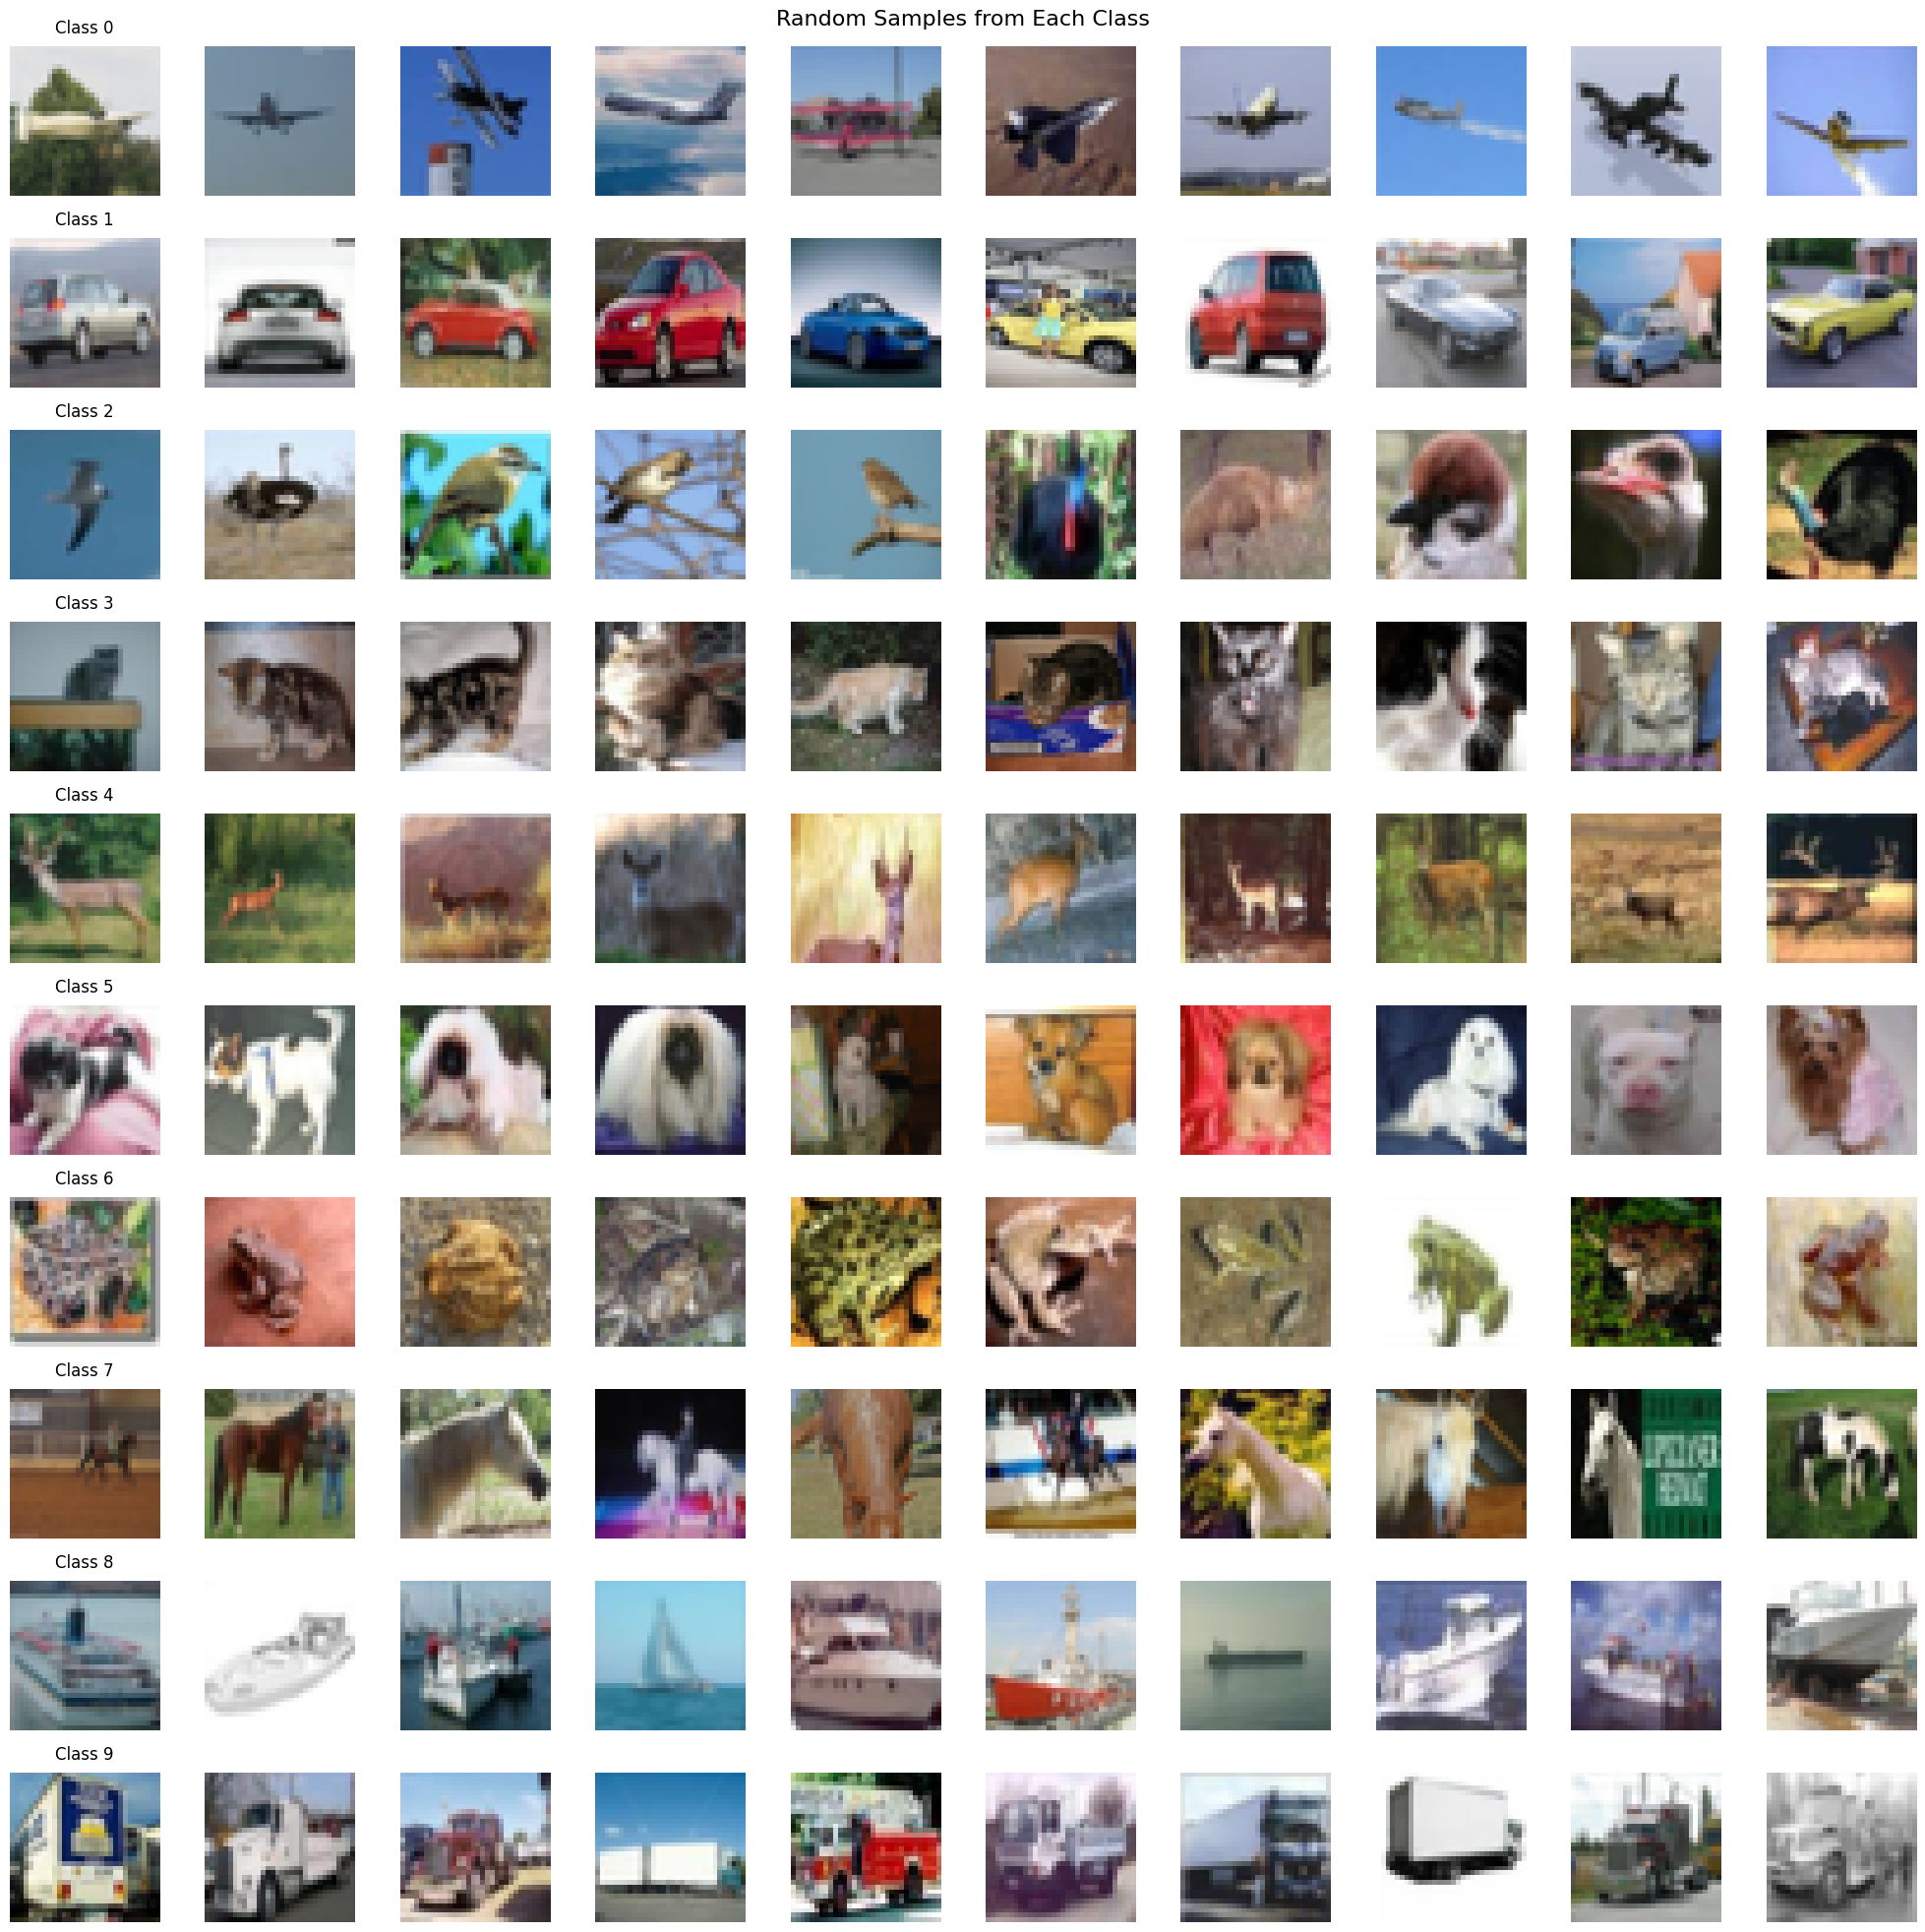

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from random import sample

def load_dataset(file_path):
    """Load the pickle dataset."""
    with open(file_path, 'rb') as f:
        data = pickle.load(f, encoding='latin-1')
    return data

def prepare_data(data):
    """Prepare and split the dataset."""
    # Reshape images and normalize
    X = data['data'].reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1).astype('float32') / 255.0
    y = np.array(data['labels'])

    # Split into train and validation (8000:2000)
    X_train, X_val = X[:8000], X[8000:]
    y_train, y_val = y[:8000], y[8000:]

    return (X_train, y_train), (X_val, y_val)

def visualize_random_samples(X, y, samples_per_class=10):
    """Visualize random samples from each class."""
    # Create a dictionary with indices for each class
    class_indices = {i: np.where(y == i)[0] for i in range(10)}

    # Create the figure
    fig, axes = plt.subplots(10, samples_per_class, figsize=(20, 20))
    fig.suptitle('Random Samples from Each Class', fontsize=16)

    # For each class
    for class_num in range(10):
        # Get random samples from this class
        class_samples = sample(list(class_indices[class_num]), samples_per_class)

        # Plot each sample
        for j, idx in enumerate(class_samples):
            axes[class_num, j].imshow(X[idx])
            axes[class_num, j].axis('off')

            # Add label only to the first image in each row
            if j == 0:
                axes[class_num, j].set_title(f'Class {class_num}', pad=10)

    plt.tight_layout()
    return fig

def main(file_path):
    """Main function to load data and create visualization."""
    # Load and prepare the dataset
    data = load_dataset(file_path)
    (X_train, y_train), (X_val, y_val) = prepare_data(data)

    # Print dataset information
    print("Dataset Information:")
    print(f"Training samples: {len(X_train)}")
    print(f"Validation samples: {len(X_val)}")
    print("\nClass distribution in training set:")
    unique, counts = np.unique(y_train, return_counts=True)
    for class_num, count in zip(unique, counts):
        print(f"Class {class_num}: {count} samples")

    # Create visualization
    fig = visualize_random_samples(X_train, y_train)
    return fig

if __name__ == "__main__":
    file_path = "/content/data"
    fig = main(file_path)
    plt.show()

# **Accuracy and Loss while adding Block 1, 2 and 3**


Analyzing models with RELU activation:
Using device: cpu

Training relu_1block
relu_1block - Epoch 5/20:
Train Loss: 1.9892, Train Acc: 47.10%
Val Loss: 2.0250, Val Acc: 42.80%

relu_1block - Epoch 10/20:
Train Loss: 1.8580, Train Acc: 60.65%
Val Loss: 1.9785, Val Acc: 48.40%

relu_1block - Epoch 15/20:
Train Loss: 1.7452, Train Acc: 72.08%
Val Loss: 1.9599, Val Acc: 49.80%

relu_1block - Epoch 20/20:
Train Loss: 1.6761, Train Acc: 78.76%
Val Loss: 1.9495, Val Acc: 51.20%


Training relu_2block
relu_2block - Epoch 5/20:
Train Loss: 2.0619, Train Acc: 39.65%
Val Loss: 2.0869, Val Acc: 36.75%

relu_2block - Epoch 10/20:
Train Loss: 1.9309, Train Acc: 52.84%
Val Loss: 2.0295, Val Acc: 42.25%

relu_2block - Epoch 15/20:
Train Loss: 1.8558, Train Acc: 60.42%
Val Loss: 1.9824, Val Acc: 47.55%

relu_2block - Epoch 20/20:
Train Loss: 1.7585, Train Acc: 70.41%
Val Loss: 1.9721, Val Acc: 48.85%


Training relu_3block
relu_3block - Epoch 5/20:
Train Loss: 2.1114, Train Acc: 34.42%
Val Loss: 2.11

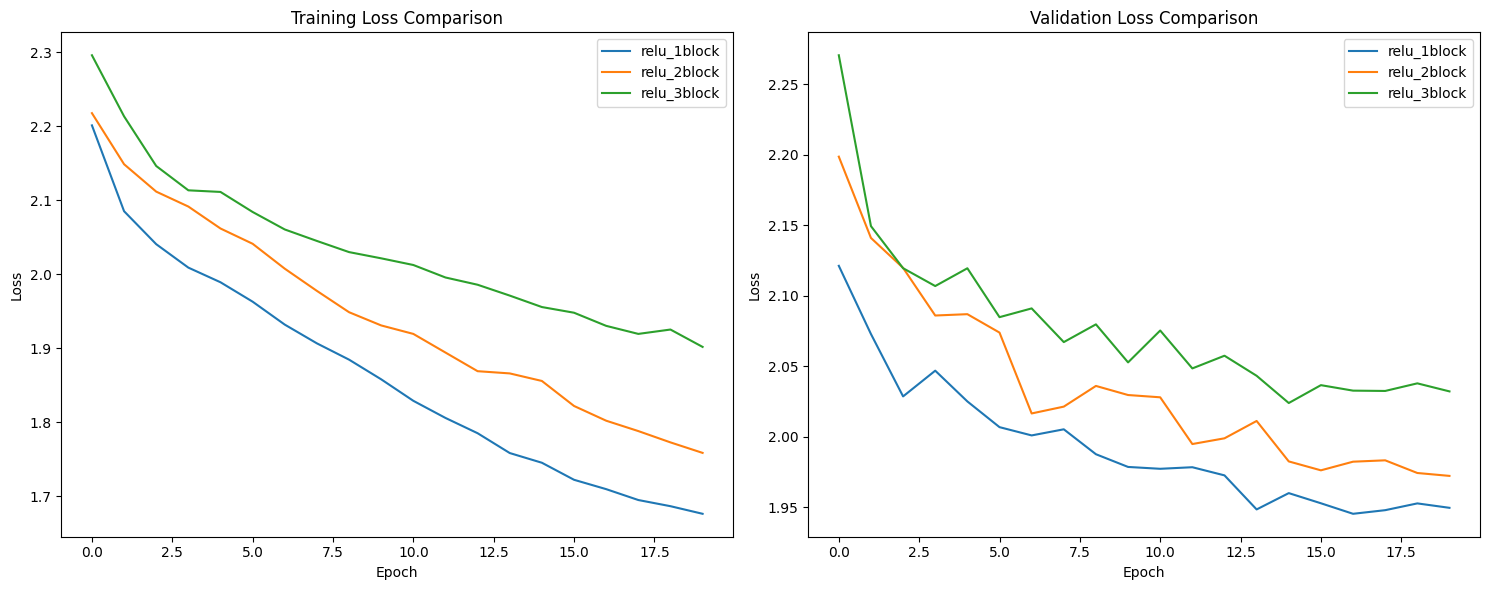

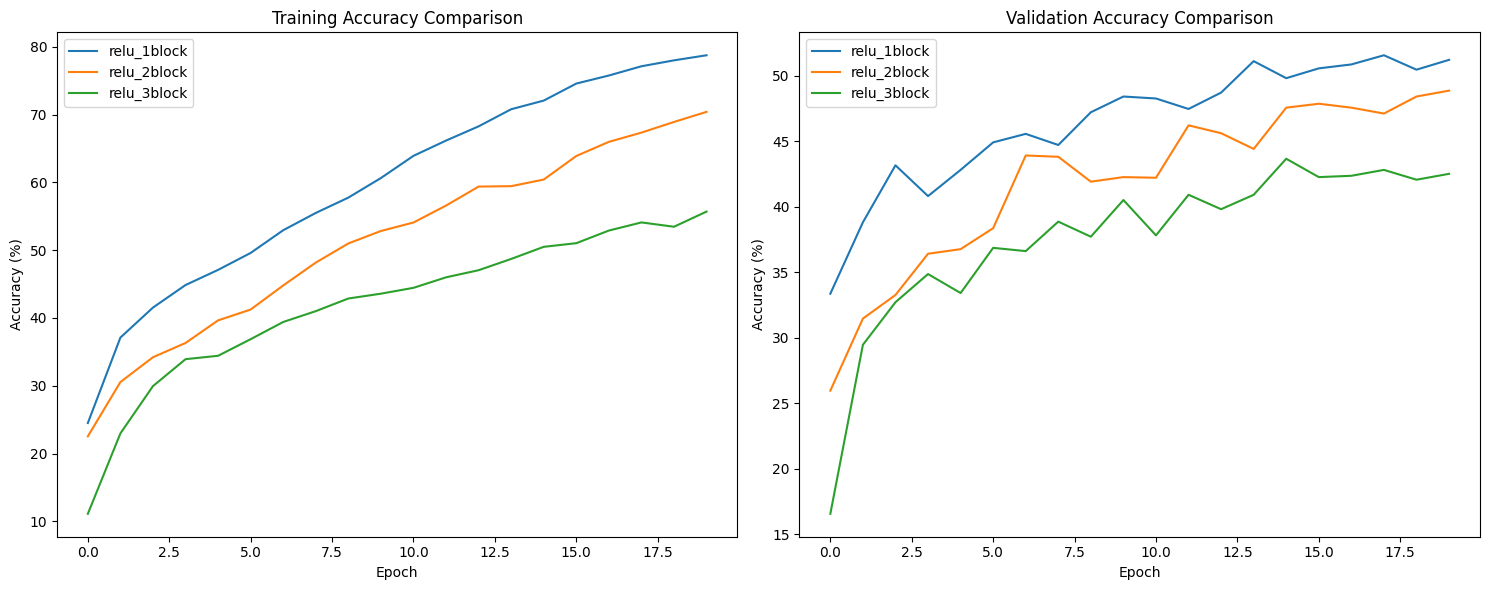

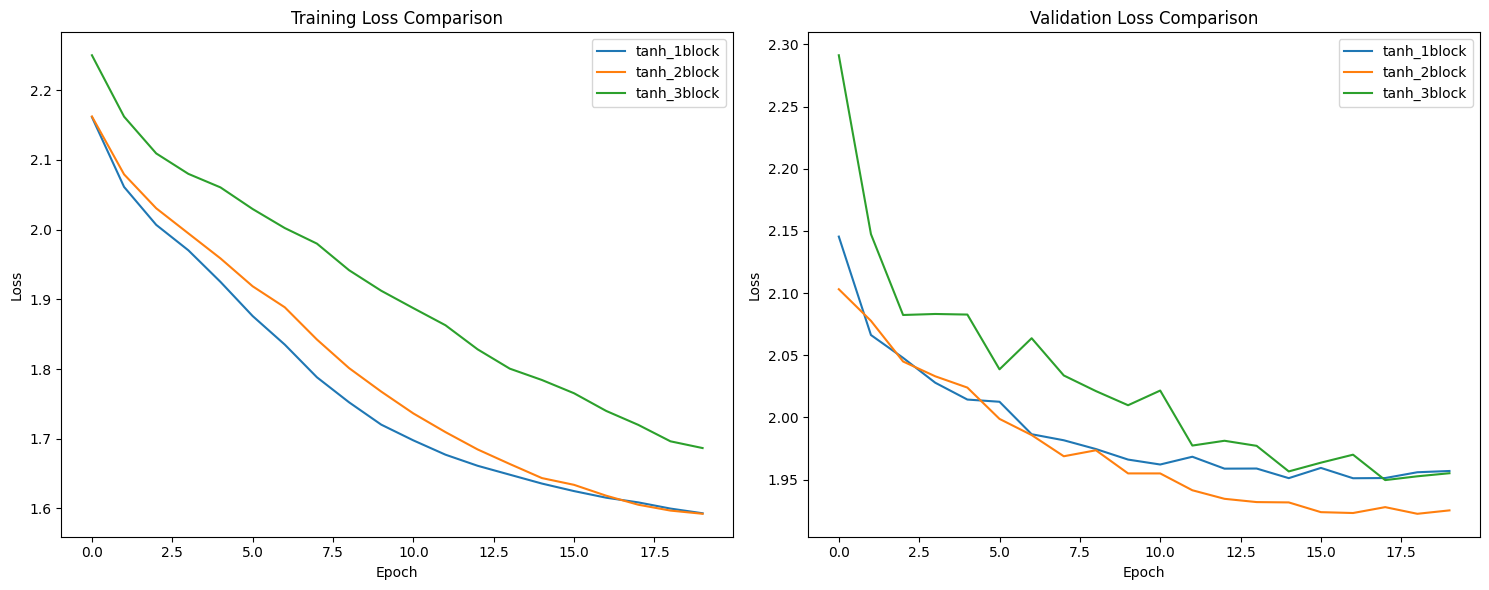

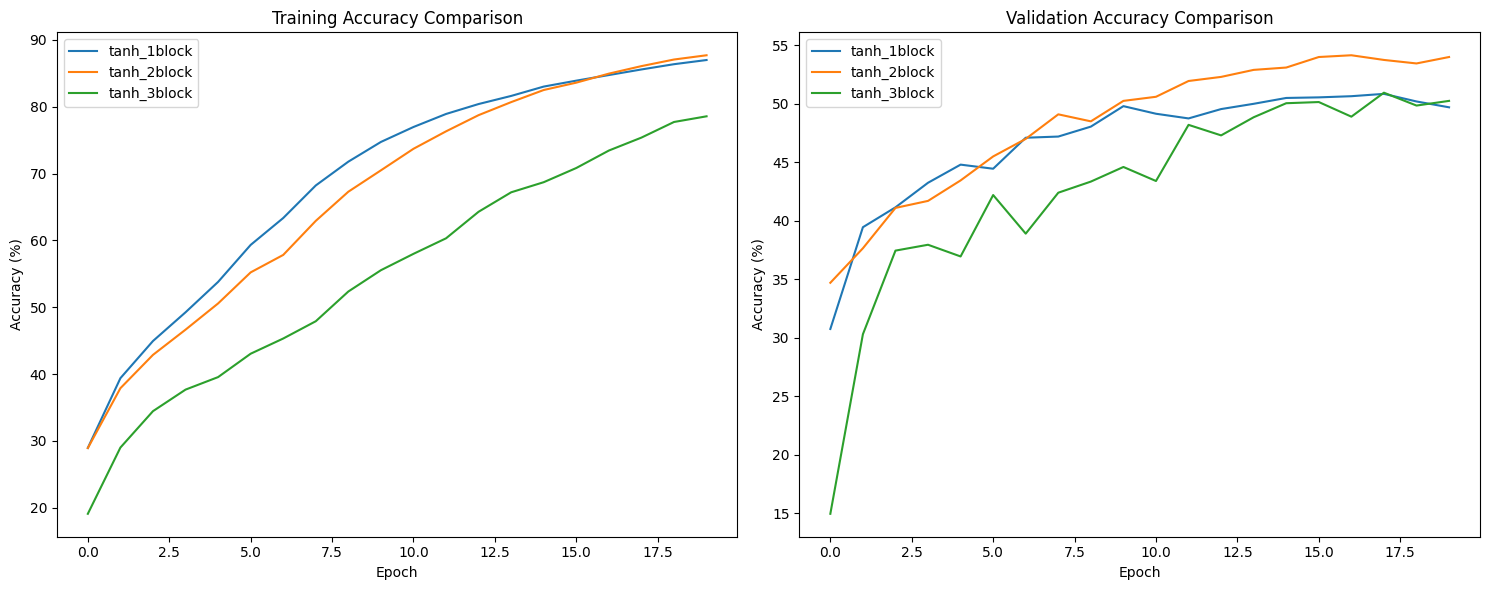

In [ ]:
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

class TrainingAnalysis:
    def __init__(self, models, criterion, optimizer_class, learning_rate):
        # Automatically determine device
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"Using device: {self.device}")

        self.models = models
        self.criterion = criterion
        self.optimizer_class = optimizer_class
        self.learning_rate = learning_rate
        self.histories = {}

    def train_epoch(self, model, train_loader, optimizer):
        model.train()
        total_loss = 0
        correct = 0
        total = 0

        for inputs, targets in train_loader:
            inputs, targets = inputs.to(self.device), targets.to(self.device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = self.criterion(outputs, targets)

            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

        return total_loss / len(train_loader), 100. * correct / total

    def validate(self, model, val_loader):
        model.eval()
        total_loss = 0
        correct = 0
        total = 0

        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(self.device), targets.to(self.device)

                outputs = model(inputs)
                loss = self.criterion(outputs, targets)

                total_loss += loss.item()
                _, predicted = outputs.max(1)
                total += targets.size(0)
                correct += predicted.eq(targets).sum().item()

        return total_loss / len(val_loader), 100. * correct / total

    def train_model(self, model_name, model, train_loader, val_loader, epochs=50):
        optimizer = self.optimizer_class(model.parameters(), lr=self.learning_rate)
        history = {
            'train_loss': [], 'train_acc': [],
            'val_loss': [], 'val_acc': []
        }

        model = model.to(self.device)

        for epoch in range(epochs):
            train_loss, train_acc = self.train_epoch(model, train_loader, optimizer)
            val_loss, val_acc = self.validate(model, val_loader)

            history['train_loss'].append(train_loss)
            history['train_acc'].append(train_acc)
            history['val_loss'].append(val_loss)
            history['val_acc'].append(val_acc)

            if (epoch + 1) % 5 == 0:  # Changed to print every 5 epochs to see progress more frequently
                print(f'{model_name} - Epoch {epoch+1}/{epochs}:')
                print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')
                print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%\n')

        self.histories[model_name] = history
        return history

    def plot_comparison(self, metric='loss'):
        plt.figure(figsize=(15, 6))

        if metric == 'loss':
            train_key = 'train_loss'
            val_key = 'val_loss'
            title = 'Loss Comparison'
            ylabel = 'Loss'
        else:
            train_key = 'train_acc'
            val_key = 'val_acc'
            title = 'Accuracy Comparison'
            ylabel = 'Accuracy (%)'

        plt.subplot(1, 2, 1)
        for model_name, history in self.histories.items():
            plt.plot(history[train_key], label=model_name)
        plt.title(f'Training {title}')
        plt.xlabel('Epoch')
        plt.ylabel(ylabel)
        plt.legend()

        plt.subplot(1, 2, 2)
        for model_name, history in self.histories.items():
            plt.plot(history[val_key], label=model_name)
        plt.title(f'Validation {title}')
        plt.xlabel('Epoch')
        plt.ylabel(ylabel)
        plt.legend()

        plt.tight_layout()
        return plt.gcf()

def prepare_data_loaders(X_train, y_train, X_val, y_val, batch_size=32):  # Reduced batch size for CPU
    # Convert to PyTorch tensors
    X_train = torch.FloatTensor(X_train).permute(0, 3, 1, 2)
    y_train = torch.LongTensor(y_train)
    X_val = torch.FloatTensor(X_val).permute(0, 3, 1, 2)
    y_val = torch.LongTensor(y_val)

    # Create datasets
    train_dataset = TensorDataset(X_train, y_train)
    val_dataset = TensorDataset(X_val, y_val)

    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    return train_loader, val_loader

def analyze_architectures(X_train, y_train, X_val, y_val, activations=['relu', 'tanh'], epochs=20):  # Reduced epochs for testing
    results = {}
    train_loader, val_loader = prepare_data_loaders(X_train, y_train, X_val, y_val)

    for activation in activations:
        print(f"\nAnalyzing models with {activation.upper()} activation:")
        models = create_models(input_channels=3, num_classes=10, activation=activation)

        analyzer = TrainingAnalysis(
            models=models['base'],
            criterion=nn.CrossEntropyLoss(),
            optimizer_class=optim.Adam,
            learning_rate=0.001
        )

        # Train each model
        for i, model in enumerate(models['base']):
            model_name = f"{activation}_{i+1}block"
            print(f"\nTraining {model_name}")
            analyzer.train_model(model_name, model, train_loader, val_loader, epochs=epochs)

        # Plot results
        loss_fig = analyzer.plot_comparison('loss')
        acc_fig = analyzer.plot_comparison('accuracy')

        results[activation] = {
            'analyzer': analyzer,
            'loss_fig': loss_fig,
            'acc_fig': acc_fig
        }

    return results


if __name__ == "__main__":
    data = load_dataset('/content/data')
    (X_train, y_train), (X_val, y_val) = prepare_data(data)

    results = analyze_architectures(X_train, y_train, X_val, y_val)

# **Dropout Probability**


Training model with conv_only dropout = 0.2
dropout_conv_only_0.2 - Epoch 5/20:
Train Loss: 2.1545, Train Acc: 29.80%
Val Loss: 2.1378, Val Acc: 31.65%

dropout_conv_only_0.2 - Epoch 10/20:
Train Loss: 2.0967, Train Acc: 35.89%
Val Loss: 2.0809, Val Acc: 37.35%

dropout_conv_only_0.2 - Epoch 15/20:
Train Loss: 2.0663, Train Acc: 38.88%
Val Loss: 2.0912, Val Acc: 36.20%

dropout_conv_only_0.2 - Epoch 20/20:
Train Loss: 2.0356, Train Acc: 41.94%
Val Loss: 2.0632, Val Acc: 39.75%


Training model with fc_only dropout = 0.2
dropout_fc_only_0.2 - Epoch 5/20:
Train Loss: 2.1245, Train Acc: 32.01%
Val Loss: 2.1040, Val Acc: 35.25%

dropout_fc_only_0.2 - Epoch 10/20:
Train Loss: 2.0674, Train Acc: 39.04%
Val Loss: 2.0716, Val Acc: 38.35%

dropout_fc_only_0.2 - Epoch 15/20:
Train Loss: 2.0002, Train Acc: 45.76%
Val Loss: 2.0579, Val Acc: 40.10%

dropout_fc_only_0.2 - Epoch 20/20:
Train Loss: 1.9380, Train Acc: 52.19%
Val Loss: 2.0184, Val Acc: 43.95%


Training model with both dropout = 0.2
dr

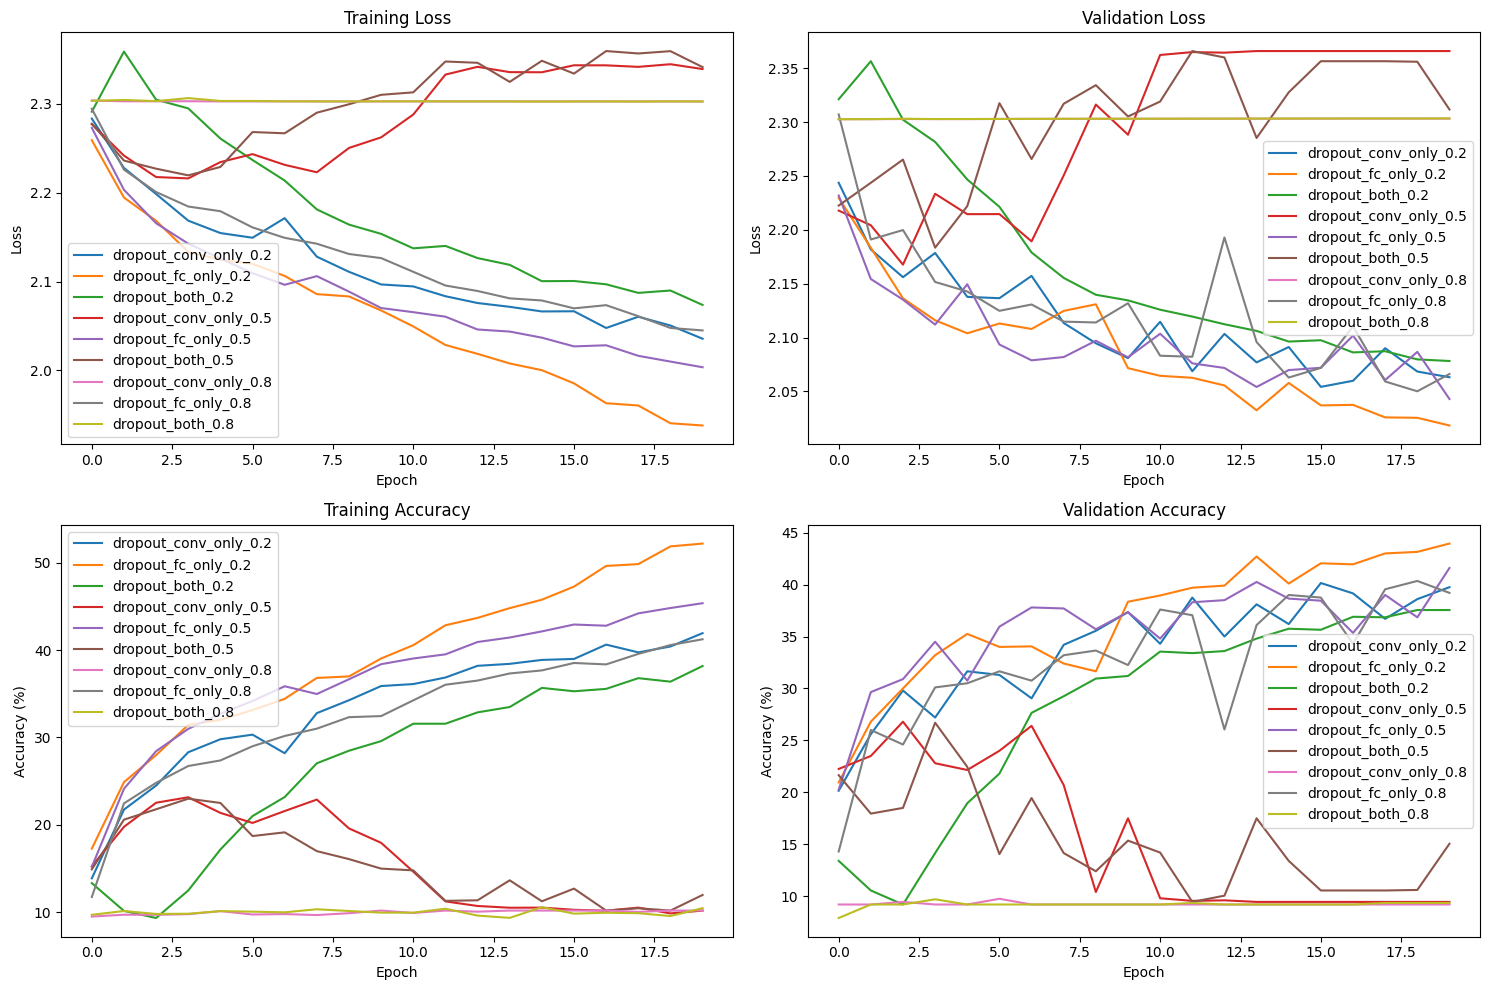

In [ ]:
class DropoutAnalysis:
    def __init__(self, input_channels, num_classes, device='cpu'):
        self.input_channels = input_channels
        self.num_classes = num_classes
        self.device = device
        self.histories = {}

    def create_model(self, conv_dropout_prob, fc_dropout_prob, activation='relu'):
        """Create model with specified dropout probabilities"""
        model = CNN_3Blocks(
            self.input_channels,
            self.num_classes,
            activation=activation,
            conv_dropout_prob=conv_dropout_prob,
            fc_dropout_prob=fc_dropout_prob
        )
        return model

    def train_model(self, model, train_loader, val_loader, model_name, epochs=20):
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        history = {
            'train_loss': [], 'train_acc': [],
            'val_loss': [], 'val_acc': []
        }

        model = model.to(self.device)

        for epoch in range(epochs):
            # Training
            model.train()
            train_loss = 0
            train_correct = 0
            train_total = 0

            for inputs, targets in train_loader:
                inputs, targets = inputs.to(self.device), targets.to(self.device)

                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, targets)

                loss.backward()
                optimizer.step()

                train_loss += loss.item()
                _, predicted = outputs.max(1)
                train_total += targets.size(0)
                train_correct += predicted.eq(targets).sum().item()

            # Validation
            model.eval()
            val_loss = 0
            val_correct = 0
            val_total = 0

            with torch.no_grad():
                for inputs, targets in val_loader:
                    inputs, targets = inputs.to(self.device), targets.to(self.device)

                    outputs = model(inputs)
                    loss = criterion(outputs, targets)

                    val_loss += loss.item()
                    _, predicted = outputs.max(1)
                    val_total += targets.size(0)
                    val_correct += predicted.eq(targets).sum().item()

            # Calculate metrics
            epoch_train_loss = train_loss / len(train_loader)
            epoch_train_acc = 100. * train_correct / train_total
            epoch_val_loss = val_loss / len(val_loader)
            epoch_val_acc = 100. * val_correct / val_total

            # Store history
            history['train_loss'].append(epoch_train_loss)
            history['train_acc'].append(epoch_train_acc)
            history['val_loss'].append(epoch_val_loss)
            history['val_acc'].append(epoch_val_acc)

            if (epoch + 1) % 5 == 0:
                print(f'{model_name} - Epoch {epoch+1}/{epochs}:')
                print(f'Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.2f}%')
                print(f'Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.2f}%\n')

        self.histories[model_name] = history
        return history

    def plot_results(self):
        """Plot training and validation metrics for all models"""
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

        # Plot training loss
        for name, history in self.histories.items():
            ax1.plot(history['train_loss'], label=name)
        ax1.set_title('Training Loss')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.legend()

        # Plot validation loss
        for name, history in self.histories.items():
            ax2.plot(history['val_loss'], label=name)
        ax2.set_title('Validation Loss')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Loss')
        ax2.legend()

        # Plot training accuracy
        for name, history in self.histories.items():
            ax3.plot(history['train_acc'], label=name)
        ax3.set_title('Training Accuracy')
        ax3.set_xlabel('Epoch')
        ax3.set_ylabel('Accuracy (%)')
        ax3.legend()

        # Plot validation accuracy
        for name, history in self.histories.items():
            ax4.plot(history['val_acc'], label=name)
        ax4.set_title('Validation Accuracy')
        ax4.set_xlabel('Epoch')
        ax4.set_ylabel('Accuracy (%)')
        ax4.legend()

        plt.tight_layout()
        return fig

def analyze_dropout_probabilities(X_train, y_train, X_val, y_val, dropout_probs=[0.2, 0.5, 0.8]):
    # Prepare data loaders
    train_loader, val_loader = prepare_data_loaders(X_train, y_train, X_val, y_val)

    # Initialize analyzer
    analyzer = DropoutAnalysis(input_channels=3, num_classes=10)

    # Test different dropout configurations
    configurations = [
        ('conv_only', True, False),
        ('fc_only', False, True),
        ('both', True, True)
    ]

    for dropout_prob in dropout_probs:
        for config_name, use_conv_dropout, use_fc_dropout in configurations:
            conv_prob = dropout_prob if use_conv_dropout else 0.0
            fc_prob = dropout_prob if use_fc_dropout else 0.0

            model_name = f'dropout_{config_name}_{dropout_prob}'
            model = analyzer.create_model(conv_prob, fc_prob)

            print(f"\nTraining model with {config_name} dropout = {dropout_prob}")
            analyzer.train_model(model, train_loader, val_loader, model_name)

    # Plot results
    fig = analyzer.plot_results()

    # Calculate final metrics
    final_metrics = {}
    for name, history in analyzer.histories.items():
        final_metrics[name] = {
            'final_train_acc': history['train_acc'][-1],
            'final_val_acc': history['val_acc'][-1],
            'final_train_loss': history['train_loss'][-1],
            'final_val_loss': history['val_loss'][-1]
        }

    return analyzer, fig, final_metrics

class CNN_3Blocks(nn.Module):
    def __init__(self, input_channels, num_classes, activation='relu',
                 conv_dropout_prob=0.0, fc_dropout_prob=0.0):
        super(CNN_3Blocks, self).__init__()
        self.activation = nn.ReLU() if activation == 'relu' else nn.Tanh()

        # Block 1: [3*3*16]*2
        self.block1 = nn.Sequential(
            nn.Conv2d(input_channels, 16, kernel_size=3, padding=1),
            self.activation,
            nn.Conv2d(16, 16, kernel_size=3, padding=1),
            self.activation,
            nn.MaxPool2d(2, 2)
        )

        # Block 2: [3*3*32]*2
        self.block2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            self.activation,
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            self.activation,
            nn.MaxPool2d(2, 2)
        )

        # Block 3: [3*3*64]*2
        self.block3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            self.activation,
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            self.activation,
            nn.MaxPool2d(2, 2)
        )

        # Dropout layers
        self.conv_dropout = nn.Dropout2d(p=conv_dropout_prob)
        self.fc_dropout = nn.Dropout(p=fc_dropout_prob)

        # Classifier
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 4 * 4, 512),
            self.activation,
            nn.Linear(512, num_classes)
        )

        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.block1(x)
        x = self.conv_dropout(x)

        x = self.block2(x)
        x = self.conv_dropout(x)

        x = self.block3(x)
        x = self.conv_dropout(x)

        x = self.classifier[0](x)  # Flatten
        x = self.classifier[1](x)  # First FC layer
        x = self.activation(x)
        x = self.fc_dropout(x)
        x = self.classifier[3](x)  # Second FC layer

        return self.softmax(x)


if __name__ == "__main__":
    dropout_probs = [0.2, 0.5, 0.8]
    analyzer, fig, metrics = analyze_dropout_probabilities(X_train, y_train, X_val, y_val, dropout_probs)

    print("\nFinal Metrics:")
    for model_name, metric in metrics.items():
        print(f"\n{model_name}:")
        for metric_name, value in metric.items():
            print(f"{metric_name}: {value:.2f}")

# **Zero, Random and He initialization**

In [ ]:
import torch.nn.init as init
import copy

class WeightInitializer:
    @staticmethod
    def zero_init(model):
        """Initialize all weights to zero"""
        for param in model.parameters():
            if len(param.shape) > 1:  # weights
                init.zeros_(param)
            else:  # biases
                init.zeros_(param)
        return model

    @staticmethod
    def random_init(model):
        """Initialize weights with random uniform distribution"""
        for param in model.parameters():
            if len(param.shape) > 1:  # weights
                init.uniform_(param, -0.05, 0.05)
            else:  # biases
                init.zeros_(param)
        return model

    @staticmethod
    def he_init(model):
        """Initialize weights using He initialization"""
        for param in model.parameters():
            if len(param.shape) > 1:  # weights
                init.kaiming_normal_(param, mode='fan_out', nonlinearity='relu')
            else:  # biases
                init.zeros_(param)
        return model

class InitializationAnalysis:
    def __init__(self, base_model, criterion, optimizer_class, learning_rate):
        self.base_model = base_model
        self.criterion = criterion
        self.optimizer_class = optimizer_class
        self.learning_rate = learning_rate
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.histories = {}

    def create_initialized_models(self):
        """Create three identical models with different initializations"""
        models = {
            'zero': WeightInitializer.zero_init(copy.deepcopy(self.base_model)),
            'random': WeightInitializer.random_init(copy.deepcopy(self.base_model)),
            'he': WeightInitializer.he_init(copy.deepcopy(self.base_model))
        }
        return models

    def train_model(self, model, train_loader, val_loader, model_name, epochs=20):
        optimizer = self.optimizer_class(model.parameters(), lr=self.learning_rate)
        history = {
            'train_loss': [], 'train_acc': [],
            'val_loss': [], 'val_acc': [],
            'gradient_norms': []  # Track gradient norms to analyze training dynamics
        }

        model = model.to(self.device)

        for epoch in range(epochs):
            # Training phase
            model.train()
            train_loss = 0
            train_correct = 0
            train_total = 0
            epoch_gradient_norms = []

            for inputs, targets in train_loader:
                inputs, targets = inputs.to(self.device), targets.to(self.device)

                optimizer.zero_grad()
                outputs = model(inputs)
                loss = self.criterion(outputs, targets)

                loss.backward()

                # Calculate gradient norms
                total_norm = 0
                for p in model.parameters():
                    if p.grad is not None:
                        param_norm = p.grad.data.norm(2)
                        total_norm += param_norm.item() ** 2
                epoch_gradient_norms.append(total_norm ** 0.5)

                optimizer.step()

                train_loss += loss.item()
                _, predicted = outputs.max(1)
                train_total += targets.size(0)
                train_correct += predicted.eq(targets).sum().item()

            # Validation phase
            val_loss, val_acc = self.validate(model, val_loader)

            # Update history
            history['train_loss'].append(train_loss / len(train_loader))
            history['train_acc'].append(100. * train_correct / train_total)
            history['val_loss'].append(val_loss)
            history['val_acc'].append(val_acc)
            history['gradient_norms'].append(np.mean(epoch_gradient_norms))

            if (epoch + 1) % 5 == 0:
                print(f'{model_name} - Epoch {epoch+1}/{epochs}:')
                print(f'Train Loss: {history["train_loss"][-1]:.4f}, '
                      f'Train Acc: {history["train_acc"][-1]:.2f}%')
                print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
                print(f'Gradient Norm: {history["gradient_norms"][-1]:.4f}\n')

        self.histories[model_name] = history
        return history

    def validate(self, model, val_loader):
        model.eval()
        val_loss = 0
        correct = 0
        total = 0

        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(self.device), targets.to(self.device)
                outputs = model(inputs)
                loss = self.criterion(outputs, targets)

                val_loss += loss.item()
                _, predicted = outputs.max(1)
                total += targets.size(0)
                correct += predicted.eq(targets).sum().item()

        return val_loss / len(val_loader), 100. * correct / total

    def plot_comparison(self):
        """Plot training metrics for all initialization methods"""
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

        for name, history in self.histories.items():
            ax1.plot(history['train_loss'], label=name)
            ax2.plot(history['val_loss'], label=name)
            ax3.plot(history['train_acc'], label=name)
            ax4.plot(history['gradient_norms'], label=name)

        ax1.set_title('Training Loss')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.legend()

        ax2.set_title('Validation Loss')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Loss')
        ax2.legend()

        ax3.set_title('Training Accuracy')
        ax3.set_xlabel('Epoch')
        ax3.set_ylabel('Accuracy (%)')
        ax3.legend()

        ax4.set_title('Gradient Norms')
        ax4.set_xlabel('Epoch')
        ax4.set_ylabel('L2 Norm')
        ax4.legend()

        plt.tight_layout()
        return fig

def compare_initializations(X_train, y_train, X_val, y_val, epochs=20):
    # Prepare data loaders
    train_loader, val_loader = prepare_data_loaders(X_train, y_train, X_val, y_val)

    # Create base model (using CNN_3Blocks as it's the most complex)
    base_model = CNN_3Blocks(input_channels=3, num_classes=10)

    # Initialize analyzer
    analyzer = InitializationAnalysis(
        base_model=base_model,
        criterion=nn.CrossEntropyLoss(),
        optimizer_class=optim.Adam,
        learning_rate=0.001
    )

    # Create and train models with different initializations
    models = analyzer.create_initialized_models()
    for name, model in models.items():
        print(f"\nTraining model with {name} initialization:")
        analyzer.train_model(model, train_loader, val_loader, name, epochs=epochs)

    # Plot results
    fig = analyzer.plot_comparison()

    return analyzer, fig


Training model with zero initialization:
zero - Epoch 5/20:
Train Loss: 2.3026, Train Acc: 10.20%
Val Loss: 2.3028, Val Acc: 9.20%
Gradient Norm: 0.0162

zero - Epoch 10/20:
Train Loss: 2.3026, Train Acc: 9.97%
Val Loss: 2.3029, Val Acc: 9.20%
Gradient Norm: 0.0162

zero - Epoch 15/20:
Train Loss: 2.3025, Train Acc: 10.20%
Val Loss: 2.3030, Val Acc: 9.20%
Gradient Norm: 0.0162

zero - Epoch 20/20:
Train Loss: 2.3025, Train Acc: 10.20%
Val Loss: 2.3031, Val Acc: 9.20%
Gradient Norm: 0.0170


Training model with random initialization:
random - Epoch 5/20:
Train Loss: 2.3026, Train Acc: 9.97%
Val Loss: 2.3028, Val Acc: 9.20%
Gradient Norm: 0.0166

random - Epoch 10/20:
Train Loss: 2.3025, Train Acc: 9.99%
Val Loss: 2.3030, Val Acc: 9.20%
Gradient Norm: 0.0167

random - Epoch 15/20:
Train Loss: 2.3025, Train Acc: 10.20%
Val Loss: 2.3032, Val Acc: 9.20%
Gradient Norm: 0.0166

random - Epoch 20/20:
Train Loss: 2.3025, Train Acc: 10.00%
Val Loss: 2.3033, Val Acc: 9.20%
Gradient Norm: 0.0176


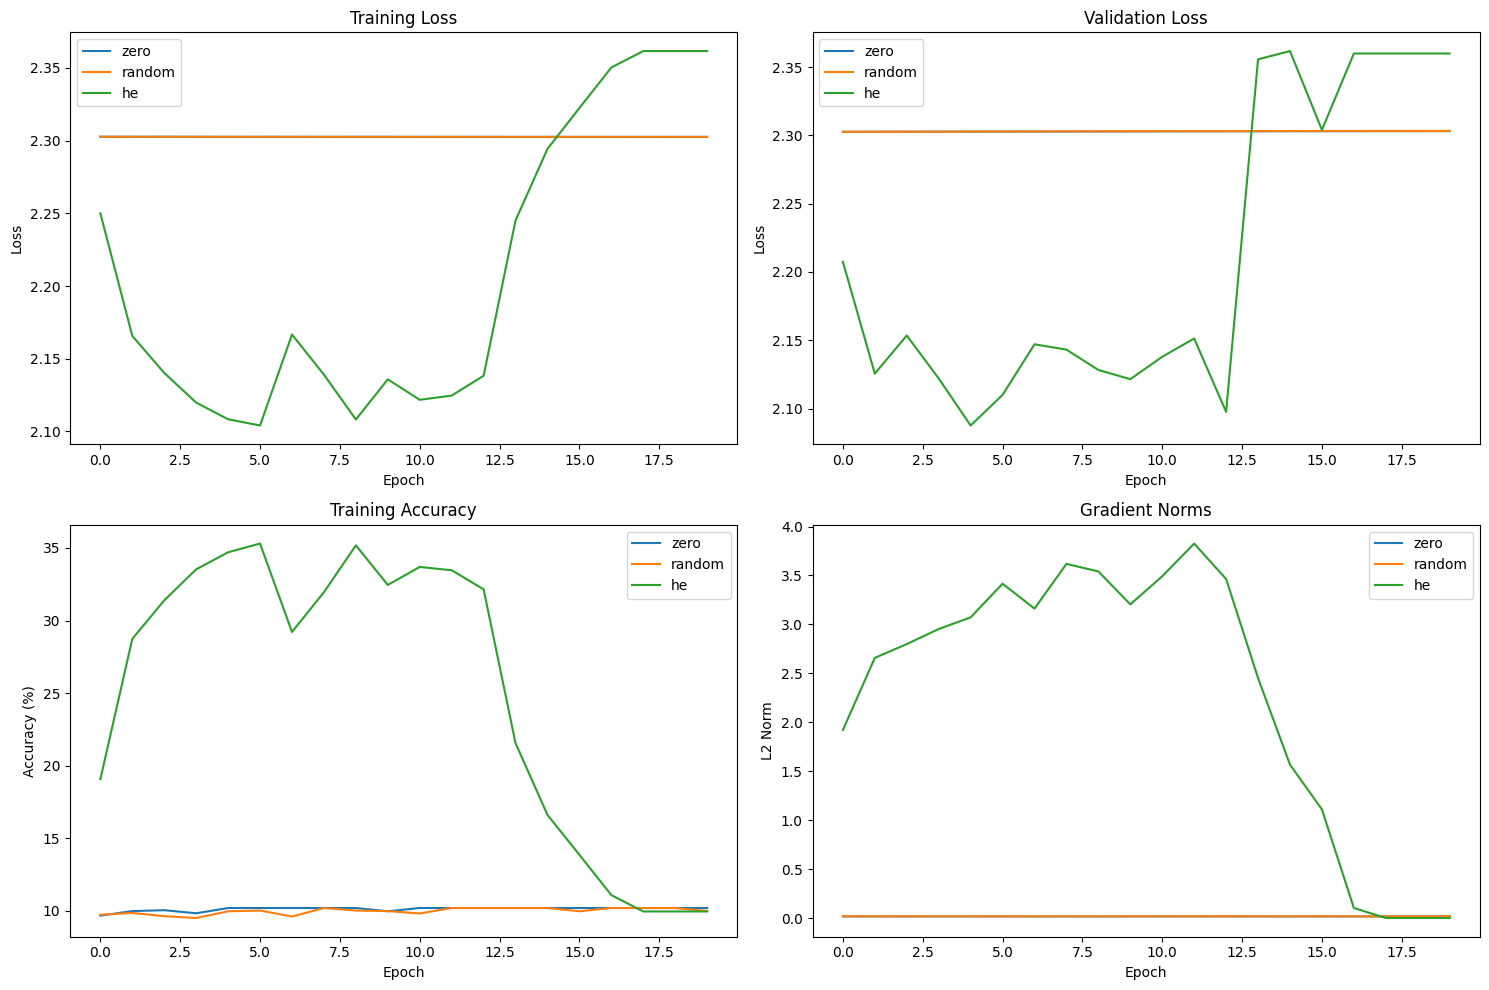

In [ ]:
data = load_dataset('/content/data')
(X_train, y_train), (X_val, y_val) = prepare_data(data)

# Run the initialization comparison
analyzer, fig = compare_initializations(X_train, y_train, X_val, y_val)
plt.show()

# **Without Activation Functions**

In [ ]:
class LinearCNN_3Blocks(nn.Module):
    def __init__(self, input_channels, num_classes):
        super(LinearCNN_3Blocks, self).__init__()

        # Block 1: [3*3*16]*2 - No activation functions
        self.block1 = nn.Sequential(
            nn.Conv2d(input_channels, 16, kernel_size=3, padding=1),
            nn.Conv2d(16, 16, kernel_size=3, padding=1),
            nn.MaxPool2d(2, 2)
        )

        # Block 2: [3*3*32]*2 - No activation functions
        self.block2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.MaxPool2d(2, 2)
        )

        # Block 3: [3*3*64]*2 - No activation functions
        self.block3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.MaxPool2d(2, 2)
        )

        # Classifier without activation functions
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 4 * 4, 512),
            nn.Linear(512, num_classes)
        )

        self.softmax = nn.Softmax(dim=1)  # Keep softmax for output probabilities

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.classifier(x)
        return self.softmax(x)

def compare_models(X_train, y_train, X_val, y_val, epochs=20):
    # Initialize both models
    standard_model = CNN_3Blocks(input_channels=3, num_classes=10, activation='relu')
    linear_model = LinearCNN_3Blocks(input_channels=3, num_classes=10)

    # Training configuration
    criterion = nn.CrossEntropyLoss()
    optimizer_standard = torch.optim.Adam(standard_model.parameters(), lr=0.001)
    optimizer_linear = torch.optim.Adam(linear_model.parameters(), lr=0.001)

    # Prepare data loaders
    train_loader, val_loader = prepare_data_loaders(X_train, y_train, X_val, y_val)

    # Training loop
    results = {
        'standard': {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []},
        'linear': {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    }

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    standard_model.to(device)
    linear_model.to(device)

    for epoch in range(epochs):
        # Train both models
        for model_name, model, optimizer in [
            ('standard', standard_model, optimizer_standard),
            ('linear', linear_model, optimizer_linear)
        ]:
            # Training phase
            model.train()
            train_loss = 0
            correct = 0
            total = 0

            for inputs, targets in train_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                optimizer.zero_grad()

                outputs = model(inputs)
                loss = criterion(outputs, targets)
                loss.backward()
                optimizer.step()

                train_loss += loss.item()
                _, predicted = outputs.max(1)
                total += targets.size(0)
                correct += predicted.eq(targets).sum().item()

            epoch_loss = train_loss / len(train_loader)
            epoch_acc = 100. * correct / total

            # Validation phase
            model.eval()
            val_loss = 0
            correct = 0
            total = 0

            with torch.no_grad():
                for inputs, targets in val_loader:
                    inputs, targets = inputs.to(device), targets.to(device)
                    outputs = model(inputs)
                    loss = criterion(outputs, targets)

                    val_loss += loss.item()
                    _, predicted = outputs.max(1)
                    total += targets.size(0)
                    correct += predicted.eq(targets).sum().item()

            val_epoch_loss = val_loss / len(val_loader)
            val_epoch_acc = 100. * correct / total

            # Store results
            results[model_name]['train_loss'].append(epoch_loss)
            results[model_name]['train_acc'].append(epoch_acc)
            results[model_name]['val_loss'].append(val_epoch_loss)
            results[model_name]['val_acc'].append(val_epoch_acc)

            if (epoch + 1) % 5 == 0:
                print(f'{model_name.capitalize()} Model - Epoch {epoch+1}/{epochs}:')
                print(f'Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.2f}%')
                print(f'Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.2f}%\n')

    return results

In [ ]:
data = load_dataset('/content/data')
(X_train, y_train), (X_val, y_val) = prepare_data(data)

# Run the model comparison
results = compare_models(X_train, y_train, X_val, y_val)

Standard Model - Epoch 5/20:
Train Loss: 2.1095, Train Acc: 34.36%
Val Loss: 2.0990, Val Acc: 35.50%

Linear Model - Epoch 5/20:
Train Loss: 2.3658, Train Acc: 9.54%
Val Loss: 2.3595, Val Acc: 10.25%

Standard Model - Epoch 10/20:
Train Loss: 2.0388, Train Acc: 41.86%
Val Loss: 2.0939, Val Acc: 36.25%

Linear Model - Epoch 10/20:
Train Loss: 2.3658, Train Acc: 9.54%
Val Loss: 2.3595, Val Acc: 10.25%

Standard Model - Epoch 15/20:
Train Loss: 1.9707, Train Acc: 48.81%
Val Loss: 2.0568, Val Acc: 39.70%

Linear Model - Epoch 15/20:
Train Loss: 2.3658, Train Acc: 9.54%
Val Loss: 2.3595, Val Acc: 10.25%

Standard Model - Epoch 20/20:
Train Loss: 1.9253, Train Acc: 53.23%
Val Loss: 2.0252, Val Acc: 42.90%

Linear Model - Epoch 20/20:
Train Loss: 2.3625, Train Acc: 9.86%
Val Loss: 2.3565, Val Acc: 10.55%

